In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/pablofonseca14/projetotcc/main/dataset/dataset_jogos.csv')
df.head()

,Div,Data,Casa,Visitante,Placar Casa,Placar Visitante,Resultado,Pontos Casa,Pontos Visitante,Soma Pontos Casa,Soma Pontos Visitante,Gols Casa,Gols Visitantes,Gols Conc. Casa,Gols Conc. Visitante,GMC,GMV,GCC,GCV,Total P. Casa,Total P. Visit.,Rodada,C1,V1,C2,V2,C3,V3,Casa Sequencia,Visitante Sequencia,Casa_AA,Visitante_AA,Dif Gols Casa,Dif Gols Visit,Dif Gols Time Casas,Dif Gols Time Visitante,Dif Pontos,Dif Posição
0,E0,10/08/2018,Man United,Leicester,2.0,1.0,C,3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,-,-,-,-,-,-,---,---,2.0,9.0,0.0,0.0,0.0,0.0,0,-7.0
1,E0,11/08/2018,Bournemouth,Cardiff,2.0,0.0,C,3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,-,-,-,-,-,-,---,---,12.0,17.0,0.0,0.0,0.0,0.0,0,-5.0
2,E0,11/08/2018,Fulham,Crystal Palace,0.0,2.0,V,0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,-,-,-,-,-,-,---,---,17.0,11.0,0.0,0.0,0.0,0.0,0,6.0
3,E0,11/08/2018,Huddersfield,Chelsea,0.0,3.0,V,0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,-,-,-,-,-,-,---,---,16.0,5.0,0.0,0.0,0.0,0.0,0,11.0
4,E0,11/08/2018,Newcastle,Tottenham,1.0,2.0,V,0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,-,-,-,-,-,-,---,---,10.0,3.0,0.0,0.0,0.0,0.0,0,7.0


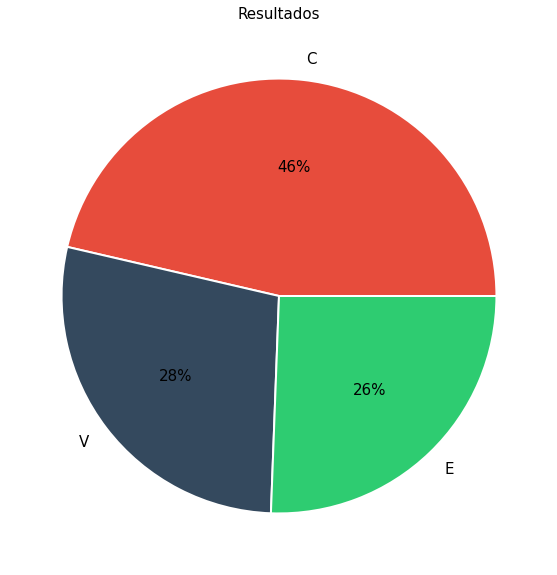

In [46]:
#Análise dos Resultados em todo o Dataset
colors = ["#e74c3c", "#34495e", "#2ecc71"]
colors1 = sns.color_palette("hls",3)
plt.figure(figsize=(10,10))
df["Resultado"].value_counts().plot.pie(autopct = "%1.0f%%",
                                  colors = colors,
                                  wedgeprops = {"linewidth":2,"edgecolor":"white"},
                                  textprops = {"fontsize": 15})
plt.title("Resultados", fontsize = 15)
plt.ylabel("");

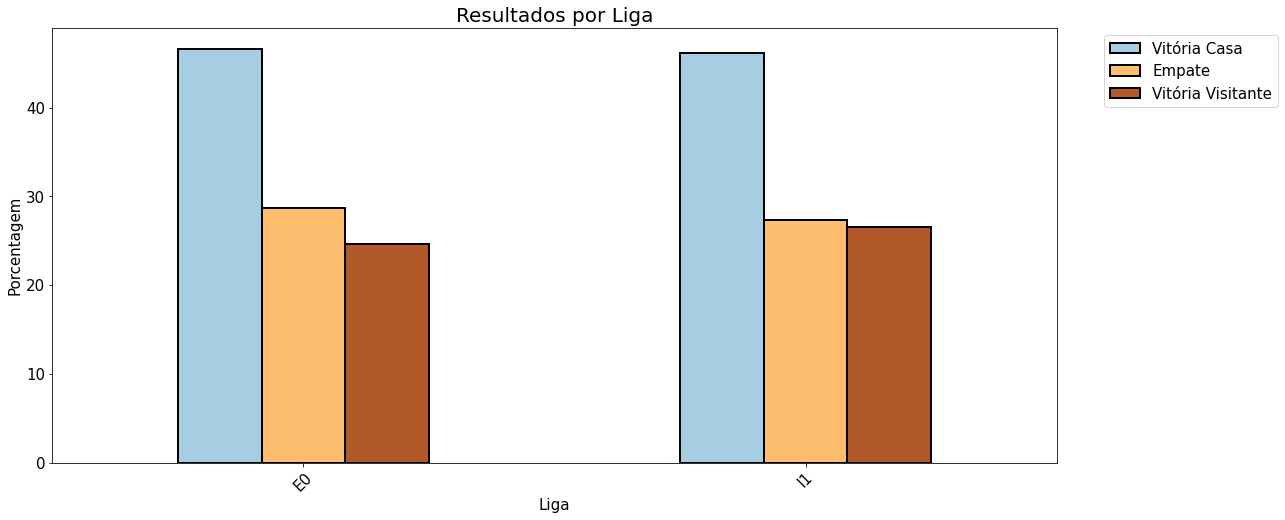

In [47]:
#Análise dos resultados separados por país
df_distrib_resultados = df.groupby(["Div", "Resultado"]).count()["Data"]
df_distrib_resultados = (df_distrib_resultados.groupby("Div")
                           .apply(lambda g: (g/g.sum()*100)).unstack()[["C", "V", "E"]])
df_distrib_resultados.plot.bar(figsize = (18,8), rot = 45, colormap = "Paired",
                                 linewidth = 2, edgecolor = "k", fontsize = 15)
plt.xlabel("Liga", fontsize = 15)
plt.ylabel("Porcentagem", fontsize = 15)
plt.title("Resultados por Liga", fontsize = 20)
plt.legend(["Vitória Casa", "Empate", "Vitória Visitante"], bbox_to_anchor=(1.04,1), 
           loc="upper left", prop = {"size": 15});

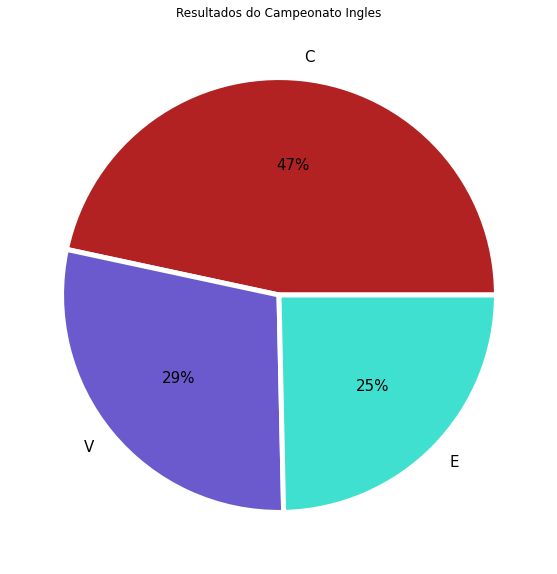

In [48]:
#Nova Visualização Campeonato Ingles
df_ing = df[df["Div"] == "E0"]

colors = ["firebrick", "slateblue", "turquoise"]
plt.figure(figsize=(10,10))
df_ing["Resultado"].value_counts().plot.pie(autopct = "%1.0f%%",
                                  colors = colors,
                                  wedgeprops = {"linewidth":5,"edgecolor":"white"},
                                  textprops = {"fontsize": 15})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.title("Resultados do Campeonato Ingles", fontsize = 12)
plt.ylabel("");

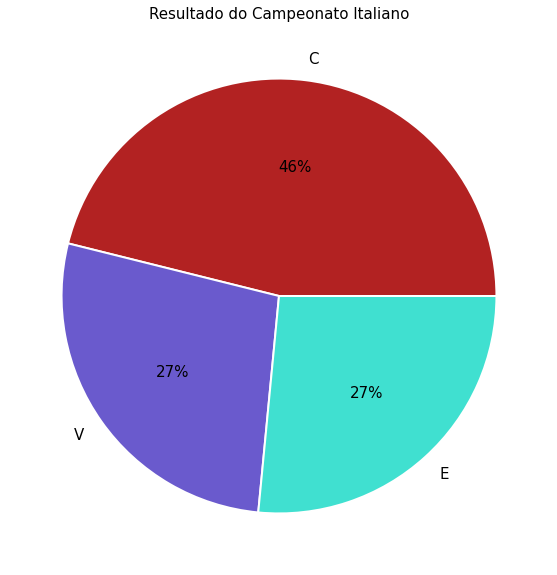

In [49]:
#Nova Visualização Campeonato Italiano

df_ita = df[df["Div"] != "E0"]

colors = ["firebrick", "slateblue", "turquoise"]
colors1 = sns.color_palette("hls",3)
plt.figure(figsize=(10,10))
df_ita["Resultado"].value_counts().plot.pie(autopct = "%1.0f%%",
                                  colors = colors,
                                  wedgeprops = {"linewidth":2,"edgecolor":"white"},
                                  textprops = {"fontsize": 15})
my_circ = plt.Circle((0,0),.7,color = "white")
#plt.gca().add_artist(my_circ)
plt.title("Resultado do Campeonato Italiano", fontsize = 15)
plt.ylabel("");

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


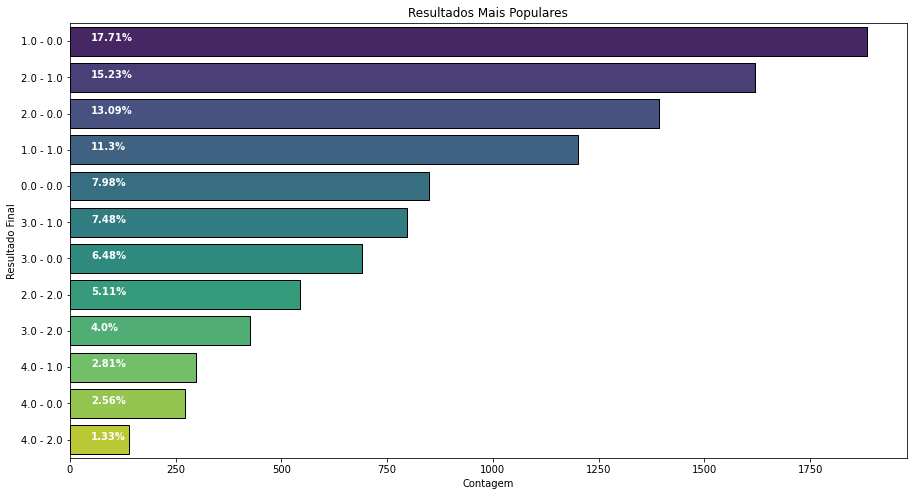

In [50]:
#Resultados mais comuns encontrados nos Datasets

placar_final = df[["Div", "Placar Casa", "Placar Visitante"]]

placar_final["PF"] = placar_final.apply(lambda x: full_time_score(x), axis = 1)
placar_final = placar_final["PF"].value_counts()[:12].reset_index()
plt.figure(figsize = (15,8))
ax = sns.barplot(y = "index", x = "PF", data = placar_final, 
                 palette = "viridis", edgecolor = "k", linewidth = 1)
plt.ylabel("Resultado Final")
plt.xlabel("Contagem")
plt.title("Resultados Mais Populares")
for i,j in enumerate(placar_final["PF"]):
    ax.text(50, i,str(round(j/len(df.index)*100,2)) + "%", 
            color = "white", weight = "bold")